In [1]:
import tkinter
from tkinter import filedialog
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import math
import random

In [2]:
# ask to chose file from your PC.
root = tkinter.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

# Load File and Check Format

In [3]:
# Get file extention (format).
file_format = file_path.split('.')[-1]
# Check about file format if csv, xlsx, xls or other.
if file_format == "csv":
    df = pd.read_csv(file_path)
elif file_format == "xlsx" or file_format == "xls":
    df = pd.read_excel(file_path)
else:
    print('File format must be csv or excel')
    quit()

# Show Data Information

In [4]:
# Show information about your data.
print("Show data information:")
print(df.info())
print("--------------------------------")
# To show all columns.
pd.options.display.max_columns = 12
print("Show some data:")
print(df.head())

Show data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
--------------------------------
Show some data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   

# Handling Missing Values

In [5]:
if df.isnull().values.any():
    # print Shape of Data.
    print("Main data shape:")
    print(df.shape)
    print("--------------------------------")
    # Create dataframe that display info about missing values
    print("Show number of missing values and percentage")
    missing_info = pd.DataFrame()
    missing_info["Missing"] = df.isnull().sum().sort_values(ascending = False)
    missing_info["Percentage % "] = df.isna().mean().sort_values(ascending = False) * 100
    print(missing_info)
    print("--------------------------------")
    # Drop Columns where percentage of missing values is greater than 50%
    df.drop(df.columns[df.isna().mean() >= 0.50], axis=1, inplace=True)
    # Handling of missing values.
    for i in range(len(df.columns)):
        if df[df.columns[i]].dtype in [np.int64, np.int32, np.int]:
            df[df.columns[i]].fillna(int(df[df.columns[i]].median()), inplace=True)
        elif df[df.columns[i]].dtype in [np.float64, np.float32, np.float]:
            df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
        elif df[df.columns[i]].dtype == bool:
            df[df.columns[i]].fillna(df[df.columns[i]].mode(), inplace=True)
        else:
            df[df.columns[i]].dropna(inplace=True)

    print('Check about missing values after handling:')
    print(df.isnull().sum())
    print(df.head())
    print("--------------------------------")
    # print Shape of Data after droping.
    print("data shape after drop columns that have 50% missing values:")
    print(df.shape)

Main data shape:
(8190, 12)
--------------------------------
Show number of missing values and percentage
              Missing  Percentage % 
MarkDown2        5269      64.334554
MarkDown4        4726      57.704518
MarkDown3        4577      55.885226
MarkDown1        4158      50.769231
MarkDown5        4140      50.549451
CPI               585       7.142857
Unemployment      585       7.142857
Store               0       0.000000
Date                0       0.000000
Temperature         0       0.000000
Fuel_Price          0       0.000000
IsHoliday           0       0.000000
--------------------------------
Check about missing values after handling:
Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64
   Store        Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1  05/02/2010        42.31       2.572  211.096358         8.106   
1      1  12/02/2010        38.51       2.548  2

# Check if dataframe has column of date type and create columns for day,month and year.

In [6]:
try:
    # List for most common date formats.
    fmts = ('%Y','%b %d, %Y','%b %d, %Y','%B %d, %Y','%B %d %Y','%m/%d/%Y','%m/%d/%y','%b %Y','%B%Y','%b %d,%Y','%d/%m/%Y',
            "EEE, dd MMM yyyy HH:mm:ss z", #RFC_822
            "EEE, dd MMM yyyy HH:mm zzzz", "yyyy-MM-dd'T'HH:mm:ssZ",
            "yyyy-MM-dd'T'HH:mm:ss.SSSzzzz", #Blogger Atom feed has millisecs also
            "yyyy-MM-dd'T'HH:mm:sszzzz", "yyyy-MM-dd'T'HH:mm:ss z",
            "yyyy-MM-dd'T'HH:mm:ssz", #ISO_8601
            "yyyy-MM-dd'T'HH:mm:ss", "yyyy-MM-dd'T'HHmmss.SSSz",
            "yyyy-MM-dd"
            )
    for i in range(len(df.columns)):
        if df[df.columns[i]].dtype not in [np.float64,np.float32,np.float,np.int,np.bool]:
            for fmt in fmts:
                for j in range(0,df.shape[0],25):
                    try:
                        datetime.datetime.strptime(str(df[df.columns[i]][j]), fmt)
                        my_fmt = fmt
                    except:
                        pass
            df[df.columns[i]] = pd.to_datetime(df[df.columns[i]], format=my_fmt)
            df['Day'] = df[df.columns[i]].dt.day
            df['Month'] = df[df.columns[i]].dt.month
            df['Year'] = df[df.columns[i]].dt.year
            df.drop(df.columns[i], axis = 1, inplace = True)
            # print Shape of Data after Splitting.
            print("data shape after splitting date column:")
            print(df.shape)
            print(df.head())
            print("--------------------------------")
except:
    pass

data shape after splitting date column:
(8190, 9)
   Store  Temperature  Fuel_Price         CPI  Unemployment  IsHoliday  Day  \
0      1        42.31       2.572  211.096358         8.106      False    5   
1      1        38.51       2.548  211.242170         8.106       True   12   
2      1        39.93       2.514  211.289143         8.106      False   19   
3      1        46.63       2.561  211.319643         8.106      False   26   
4      1        46.50       2.625  211.350143         8.106      False    5   

   Month  Year  
0      2  2010  
1      2  2010  
2      2  2010  
3      2  2010  
4      3  2010  
--------------------------------


#                                                  Data Visualization

In [7]:
int_columns = df.select_dtypes(include = ['int','int32','int64']).columns
float_columns = df.select_dtypes(include = ['float','float32','float64']).columns
objects_value = df.select_dtypes(exclude = ['int','int32','int64','float','float32','float64']).columns
numeric_data = pd.concat([df[int_columns],df[float_columns]],axis = 1)
categorical_data = df[objects_value]

###                                               Numeric-Numeric Analysis (Univariate Analysis)

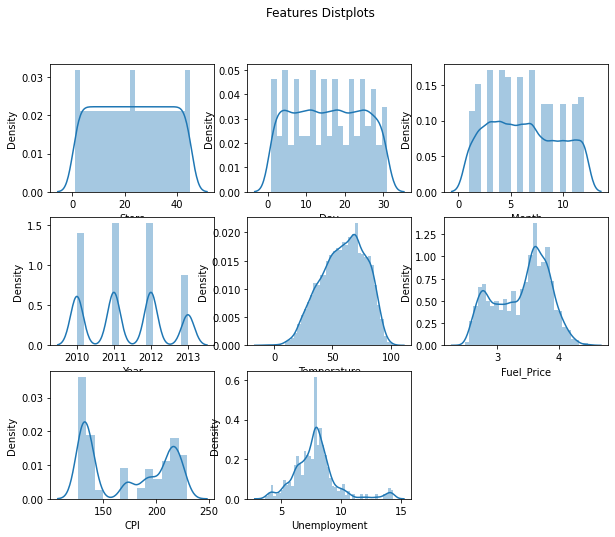

In [8]:
try:
    num_plots_x = 3   # No. of plots in every row.
    num_plots_y = math.ceil(len(numeric_data.columns)/num_plots_x) # No. of plots in every column.
    # distribution plot for all numerical columns.
    figure, axis = plt.subplots(num_plots_y,num_plots_x)
    figure.set_size_inches(10, 8)
    figure.suptitle('Features Distplots')
    count = 0
    for i in range(num_plots_y):
        for j in range(num_plots_x):
            if count >= numeric_data.shape[1]:
                axis[i,j].set_visible(False)
                continue
            sns.distplot(numeric_data[numeric_data.columns[count]],ax = axis[i,j])
            count = count + 1
    if len(numeric_data[numeric_data.columns] != 0):
        plt.show()
except:
    plt.close()

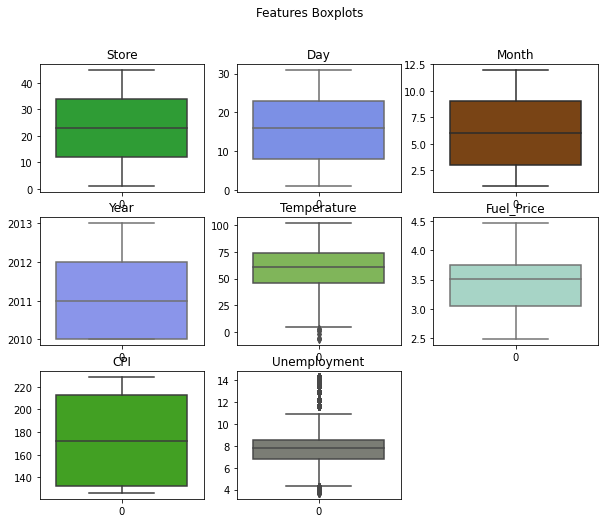

In [19]:
try:
    # box plot plot for all numerical columns.
    figure, axis = plt.subplots(num_plots_y,num_plots_x)
    figure.set_size_inches(10, 8)
    figure.suptitle('Features Boxplots')
    count = 0
    for i in range(num_plots_y):
        for j in range(num_plots_x):
            r, g, b = random.random(), random.random(), random.random()
            if count >= numeric_data.shape[1]:
                axis[i,j].set_visible(False)
                continue
            sns.boxplot(data = numeric_data[numeric_data.columns[count]],ax = axis[i,j], color = (r,g,b))
            axis[i,j].set_title(numeric_data.columns[count])
            count = count + 1
    plt.show()
except:
    plt.close()

###                                                   Numeric-Numeric Analysis (Bivariate Analysis)

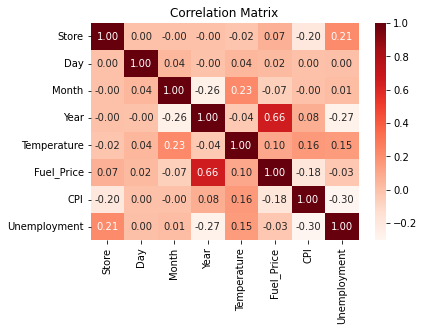

In [10]:
# Show Correlation Matrix.
plt.title('Correlation Matrix')
sns.heatmap(numeric_data.corr(), annot = True, fmt = '.2f', cmap = 'Reds')
plt.show()

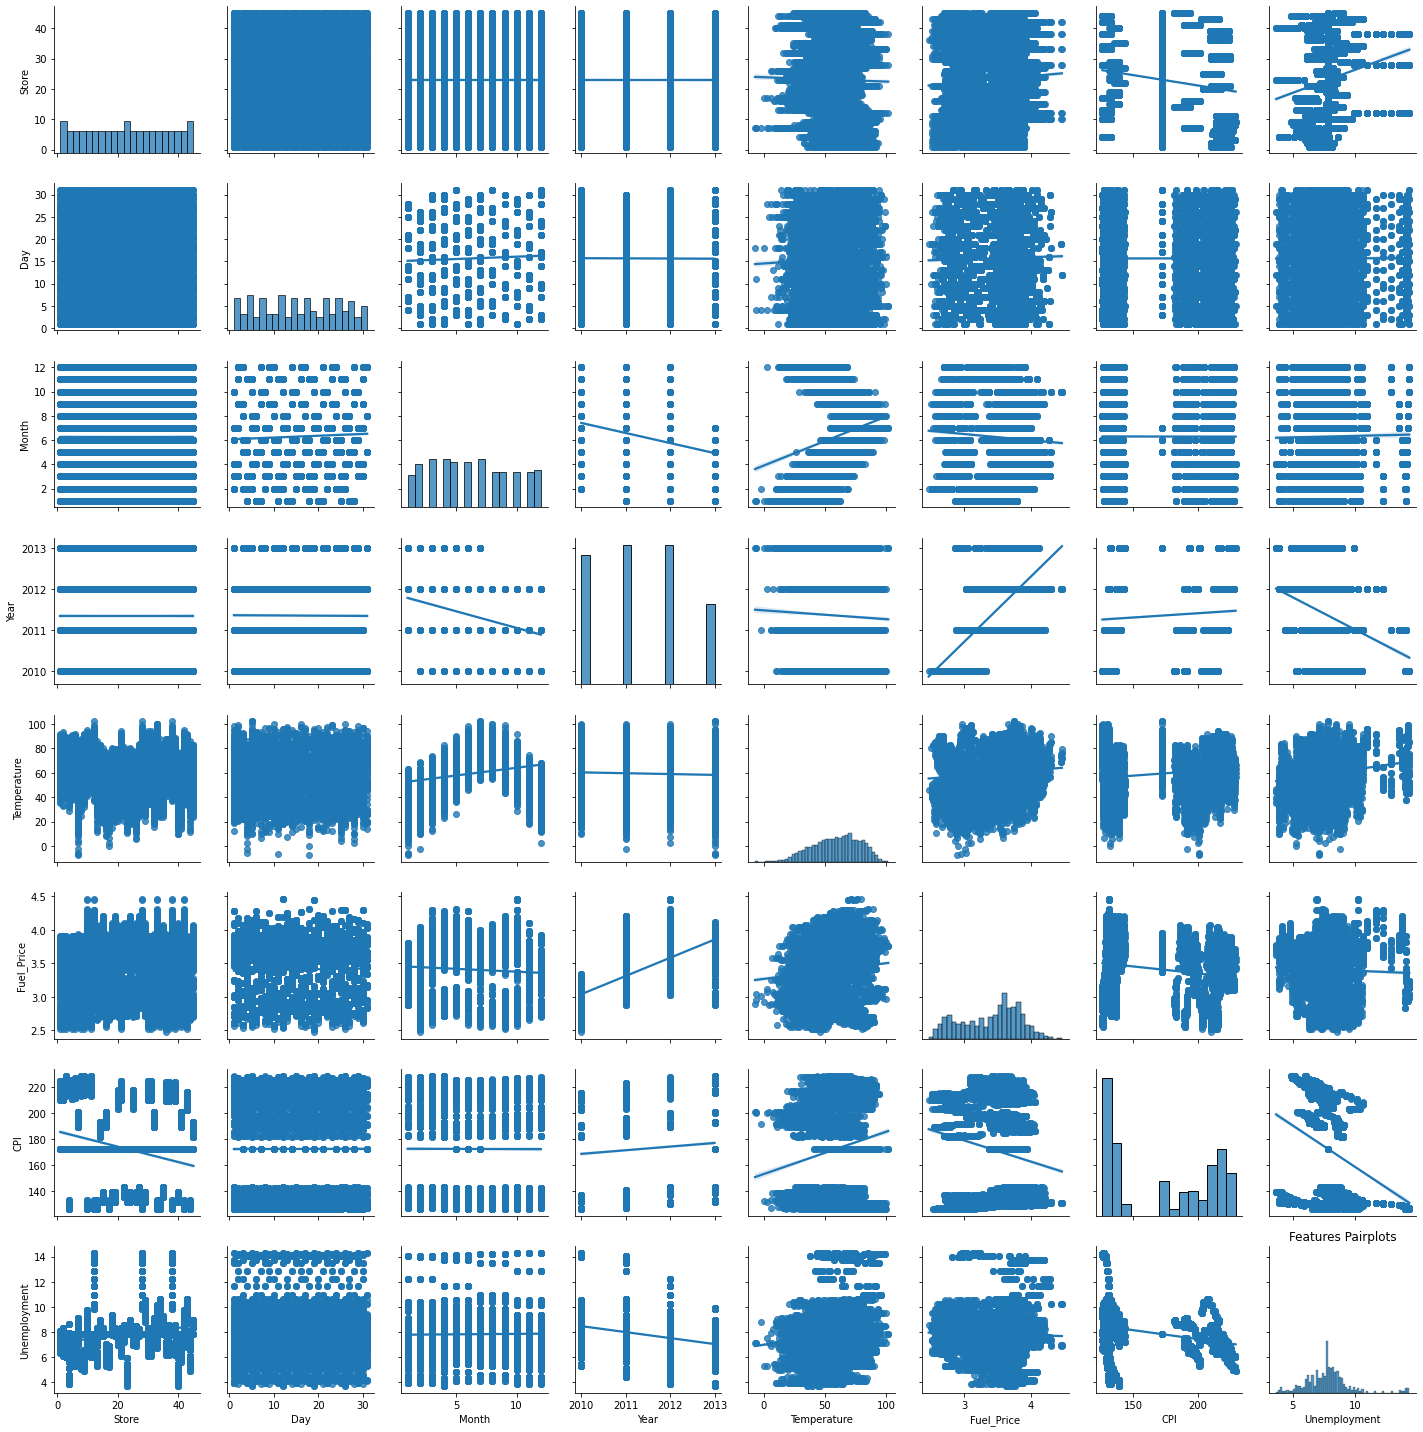

In [11]:
# pair plotting.
sns.pairplot(numeric_data[numeric_data.columns], kind = 'reg')
plt.title('Features Pairplots')
plt.tight_layout()
plt.show()

###                                                      Numeric-Categorical Analysis

In [12]:
print('some categorical analysis: ')
print("--------------------------------")
for i in range(len(categorical_data.columns)):
    for j in range(len(numeric_data.columns)):
        print(df.groupby(categorical_data.columns[i])[numeric_data.columns[j]].mean().sort_values(ascending = False))
        print("--------------------------------")

some categorical analysis: 
--------------------------------
IsHoliday
False    23.0
True     23.0
Name: Store, dtype: float64
--------------------------------
IsHoliday
True     17.692308
False    15.502959
Name: Day, dtype: float64
--------------------------------
IsHoliday
True     8.000000
False    6.159763
Name: Month, dtype: float64
--------------------------------
IsHoliday
False    2011.366864
True     2011.153846
Name: Year, dtype: float64
--------------------------------
IsHoliday
False    60.194901
True     48.453060
Name: Temperature, dtype: float64
--------------------------------
IsHoliday
False    3.415351
True     3.284323
Name: Fuel_Price, dtype: float64
--------------------------------
IsHoliday
True     172.599618
False    172.450132
Name: CPI, dtype: float64
--------------------------------
IsHoliday
False    7.828144
True     7.809626
Name: Unemployment, dtype: float64
--------------------------------
